In [1]:
# Importing the sample dataset 'fetch_20newgroups'
# From the skleanr.datasets library
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import os
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fetch the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Extracting the data and the target
data = newsgroups.data
target = newsgroups.target
target_names = newsgroups.target_names

# Creating a DataFrame for the dataset
df = pd.DataFrame({'text': data, 'category': target})
df['category_name'] = df['category'].apply(lambda x: target_names[x])

# Turning the dataset to a CSV file in the home directory
home_directory = os.path.expanduser('~')
file_path = os.path.join(home_directory, '20_newsgroups_dataset.csv')
df.to_csv(file_path, index=False)

In [3]:
# Import the 20_newsgroups_dataset
groupchat_df = pd.read_csv('20_newsgroups_dataset.csv')
print(groupchat_df.dtypes)
groupchat_df.head(10)

text             object
category          int64
category_name    object
dtype: object


,text,category,category_name
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware
5,From: tell@cs.unc.edu (Stephen Tell)\nSubject:...,12,sci.electronics
6,From: lpa8921@tamuts.tamu.edu (Louis Paul Adam...,4,comp.sys.mac.hardware
7,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey
8,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey
9,From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arro...,19,talk.religion.misc


In [4]:
# Now, I will preprocess and clean the dataset
# Firstly, I will check for missing values
print(groupchat_df.isnull().sum())

text             0
category         0
category_name    0
dtype: int64


In [5]:
# I will also conduct EDA
groupchat_df.describe()

,category
count,18846.000000
mean,9.293166
std,5.562798
min,0.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


In [6]:
groupchat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           18846 non-null  object
 1   category       18846 non-null  int64 
 2   category_name  18846 non-null  object
dtypes: int64(1), object(2)
memory usage: 441.8+ KB


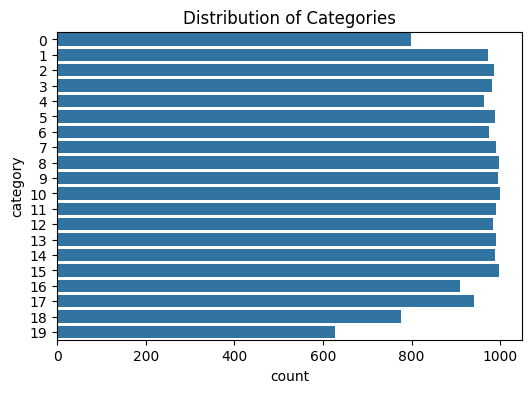

In [7]:
# Now I iwll check to see how the data is distributed
plt.figure(figsize=(6,4))
sns.countplot(y='category', data=groupchat_df)
plt.title('Distribution of Categories')
plt.savefig('distribution_of_categories.png')
plt.show()

In [8]:
# No missing data
# I will now clean the text data
# Stopwords often carry less meaningful information and are removed
# Downloading 'stopwords' ensures that a list of English stopwords are available
# To use as a reference
nltk.download('stopwords')

# Define a funtion to clean the text data
def clean_text(text):
    # Remove special characters using the 're' module
    # Replace them with whitespace
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lower case
    text = text.lower()
    # Remove the numbers using the 're' module
    # Replace them with whitespace
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the function to the dataframe
groupchat_df['cleaned_text'] = groupchat_df['text'].apply(clean_text)
groupchat_df.head(10)

[nltk_data] Downloading package stopwords to /Users/ella/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,category,category_name,cleaned_text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey,mamatha devineni ratnam mrandrewcmuedu subject...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware,mblawsonmidwayecnuoknoredu matthew b lawson su...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast,hilmierdsvsuse hilmi eren subject armenia says...
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware,guydaustinibmcom guy dawson subject ide vs scs...
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware,alexander samuel mcdiarmid amoandrewcmuedu sub...
5,From: tell@cs.unc.edu (Stephen Tell)\nSubject:...,12,sci.electronics,tellcsuncedu stephen tell subject subliminal m...
6,From: lpa8921@tamuts.tamu.edu (Louis Paul Adam...,4,comp.sys.mac.hardware,lpatamutstamuedu louis paul adams subject numb...
7,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,dchhabrastplistsca deepak chhabra subject atla...
8,From: dchhabra@stpl.ists.ca (Deepak Chhabra)\n...,10,rec.sport.hockey,dchhabrastplistsca deepak chhabra subject goal...
9,From: arromdee@jyusenkyou.cs.jhu.edu (Ken Arro...,19,talk.religion.misc,arromdeejyusenkyoucsjhuedu ken arromdee subjec...


In [9]:
# Initialise the TF-IDF vectoriser
# Using max_df = 0.7 
# This parametre ignores terms in more than 70% of the texts
tfidf_vectoriser = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the cleaned data
X = tfidf_vectoriser.fit_transform(groupchat_df['cleaned_text'])

# Extract the dependent variable
y = groupchat_df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

# Initialise the Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fit the classifier onto the training data
nb_classifier.fit(X_train, y_train)

# Generate predictions for the test set
y_pred = nb_classifier.predict(X_test)

# Print out predictions
print(f"Predictions:{y_pred}")

Training data: (15076, 159366) (15076,)
Test data: (3770, 159366) (3770,)
Predictions:[ 9 12 14 ...  0  0 14]


In [10]:
# Evaluate the model
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score:{accuracy}")

# Generate a classification report
# Turning target names into a list of strings instead of integers
target_name_list = [str(name) for name in groupchat_df['category'].unique()]
model_report = classification_report(y_test, y_pred, target_names = target_name_list)
print(model_report)

Accuracy score:0.8846153846153846
              precision    recall  f1-score   support

          10       0.85      0.84      0.84       151
           3       0.86      0.85      0.85       202
          17       0.87      0.85      0.86       195
           4       0.65      0.89      0.75       183
          12       0.95      0.89      0.92       205
          19       0.95      0.88      0.92       215
          11       0.92      0.71      0.80       193
          13       0.92      0.95      0.93       196
           0       0.90      0.95      0.93       168
           8       0.98      0.97      0.97       211
           7       0.95      0.99      0.97       198
           5       0.88      0.98      0.93       201
           1       0.95      0.84      0.89       202
          14       0.98      0.94      0.96       194
          16       0.94      0.99      0.96       189
           6       0.70      0.99      0.82       202
           9       0.81      0.98      0.89    

In summary, the model performs well overall with a high accuracy of 88%. However, there are some classes where performance could be improved, particularly class 15, which has very low recall. This suggests that the model struggles to identify this class effectively. The high performance on many classes suggests that the model is generally effective but might benefit from additional tuning.